## 1. 重点回顾

```python
@装饰器3  # func = 2.inner; return 3.inner
@装饰器2  # func = 1.inner; return 2.inner
@装饰器1  # func = fn ;return 1.inner
def fn():
    pass

# fn = 3.inner

fn()

__call__方法    实例对象(); 实例对象.__call__()


def 装饰器(原函数):
    @functools.wraps(原函数)
    def inner():
        pass
    return inner


@装饰器
def fn():
    pass


# @functools.wraps(原函数)保留原函数的帮助信息 函数名
fn.__doc__ .__name__ 


正则作用: 用来描述 匹配/提取/搜索规则的字符串
r 作用 : 自动对正则中\进行转义
元字符: . [abc] [a-c] [^a-c] \d \D \s \S \w \W
量词:  [a-z]{m,n}   {m,m}{m}  {1,}+   {0,}={,}=*
       https?
        
位置: r'^正则$'
分组: 
    目的 提取部分
    匿名 按分组编号  0 号分组存整体结果
    	创建   (正则)
        获取   .group(分组编号)
        引用   \分组编号
    有名 按照分组名字   不受分组编号发生变化的影响
    	创建   (?P<分组名>正则)
        获取   .group('分组名字')
        引用   (?P=分组名)
        
贪婪  尽可能多默认    懒惰尽可能少  在整体结果必须匹配的情况

property 属性: 对象.属性 既简单有安全
class 类(object):
	def __init__(self, X1):
        self.__X = X1
    
    @property
    def X(self):
        return self.__X
    
    @X.setter
    def X(self, newX):
        判断
        
class 类(object):
	def __init__(self, X1):
        self.__X = X1
    
    def get_X(self):
        return self.__X

    def set_X(self, newX):
        判断        
    
    X = property(get_X, set_X)
    
对象 = 类()
对象.X
```

## 2. Python 高级语法

### 2.1 上下文管理器	

```python
# 1 一个进程所能打开资源是有限的   用完资源随手关闭
# 2 with作用: 正常和异常情况  自动将用户打开的资源进行关闭

# 常见的上下管理器:    文件、互斥锁、数据库连接、数据库游标、套接字
# 3 上下文管理器:  提供资源 给 with 使用; 提供关闭资源的方法
#   实现上下文管理器：  __enter__        __exit__
class DBConnection(object):
    def __init__(self):
        """建立和数据库的连接"""
        import pymysql
        self.conn = pymysql.connect(host='localhost',port=3306,user='root',password='mysql',
                                    db='py28',charset='utf8')
        self.cur = self.conn.cursor()

    def __enter__(self):
        """上文  给 with提供资源"""
        return self.cur

    def __exit__(self, exc_type, exc_val, exc_tb):
        """下文 关闭资源"""
        # exc_type异常类型, exc_val异常数据, exc_tb异常跟踪信息
        # 如果没有发生异常 这三个参数都为 None  否则不为 None
        if exc_type:
            print("异常发生了")
        self.cur.close()
        self.conn.close()

with DBConnection() as cur:
    cur.execute("select * from hero1");
    print(cur.fetchall())
```



### 2.2 生成器

​	生成器generator: 根据用户所需数据的**规律**  动态**生成**数据的 器

​	空间占用很小  节约大量的内存

#### 2.2.1 生成器表达式

```python
# 列表推导式  缺点: 空间占用大
l1 = [i for i in range(1000000)]



# 1 生成器表达式    2 生成器函数
l2 = (i for i in range(1000000))

print(type(l1), type(l2))  # <class 'list'> <class 'generator'>
print(l1.__sizeof__(), l2.__sizeof__())

# 生成器 同样支持 for /next 迭代访问
for i in l2:
    print(i)
```



#### 2.2.2 生成器函数

```python

# 生成器函数： 含有 yield 关键字的函数 不再普通函数了
# 普通函数 引用()就会执行这个代码了
# 生成器器对象 = 生成器函数()

def func():
    print("in func")
    yield 100
    yield 101
    yield 102

# yield 作用  1 暂停当前代码执行  返回值到调用生成器的地方
# 2 恢复代码执行  紧接上次暂停的位置继续往下

# 因为 func不是普通函数了 所以 f 就不再是返回值  而是生成器对象了
f = func()
print(type(f))  # <class 'generator'>

# for i in f:
#     print(i)
print(next(f))
print(next(f))
print(next(f))
print(next(f))   # 迭代完成 StopIteration  抛出停止迭代异常
```





#### 2.2.3 模拟for循环实现

```python
# for i in f:
#     print(i)
while True:
    try:
        i = next(f)  # next 函数的作用是什么?  从生成器对象获取一个值
    except StopIteration as e:   # 迭代完成 StopIteration  抛出停止迭代 异常
        break
    else:
        print(i)
```

### 2.3 深/浅拷贝

>   面试必问

数据拷贝目的: 保证数据的独立性

1 浅拷贝   只拷贝数据的顶层   不彻底
2 深拷贝    拷贝数据的所有层次  完全彻底
3 在 Python 默认都是浅拷贝
4 深拷贝只能使用 copy.deepcopy() 
5 浅拷贝(copy.copy() [:]  X.copy())



```python
import copy

t = [5,6]

l1 = [1, 2, 3, 4, t]
l2 = copy.copy(l1)  # 浅拷贝

print(l1, l2)
print(id(l1), id(l2))
print(id(l1[4]), id(l2[4]))

l1[4][0] = 555
print(l1, l2)

l3 = copy.deepcopy(l1)  # 深拷贝
print(l1, l3)
print(id(l1), id(l3))
print(id(l1[4]), id(l3[4]))
l1[4][0] = 666
print(l1, l3)
```



拷贝对于不可变类型的意义

```python
import copy


a = (1,2,3)
b = a
print(id(a), id(b))  # 4481112896 4481112896

c = copy.copy(a)
print(id(a), id(c))  # 4481112896 4481112896

d = copy.deepcopy(a)
print(id(a), id(d))  # 4481112896 4481112896

# 对于全部都是不可变类型数据  的对象 深浅拷贝一律都是引用赋值
```

不可变对象中含有可变数据的拷贝

```python
import copy


a = (1,2,3,[4,5])
b = a
print(id(a), id(b))  # 4322945688 4322945688

c = copy.copy(a)
print(id(a), id(c))  # 4322945688 4322945688

d = copy.deepcopy(a)
print(id(a), id(d))  # 4322945688 4322946008
print(id(a[3]), id(d[3]))  # 4387598280 4387821640

# 对于全部都是不可变类型数据  的对象 深浅拷贝一律都是引用赋值
# 对于不可变对象中含有可变数据  浅拷贝是引用赋值；深拷贝就是会完全拷贝
```


可变对象中含有不可变数据
```python
import copy


a = [1,2,3,(4,5)]
b = a
print(id(a), id(b))  # 4481314760 4481314760

c = copy.copy(a)
print(id(a), id(c))       # 4481314760 4481538056
print(id(a[3]), id(c[3]))  # 4481481992 4481481992

d = copy.deepcopy(a)
print(id(a), id(d))        # 4481314760 4481538120
print(id(a[3]), id(d[3]))  # 4481481992 4481481992


# 1 对于全部都是不可变类型数据  的对象 深浅拷贝一律都是引用赋值
# 2 对于不可变对象中含有可变数据  浅拷贝是引用赋值；深拷贝就是会完全拷贝
# 3 对于可变对象中含有不可变数据  浅/深拷贝一律都是浅拷贝
```



## 3. web 框架



![webæ¡æ¶åwebæå¡å¨çå³ç³»](day13 笔记.assets/web框架和web服务器的关系.png)

web 服务器: 接收 HTTP 请求 处理静态  转发动态

web 框架:  接收请求  操作数据库 操作模板 拼接成完整网页 给服务器

静态: 不需要经常变化   css js png jpg

动态:  经常变化的        html

模板:   没有用户数据的网页   需要框架往其中添加







路由列表

模板概念

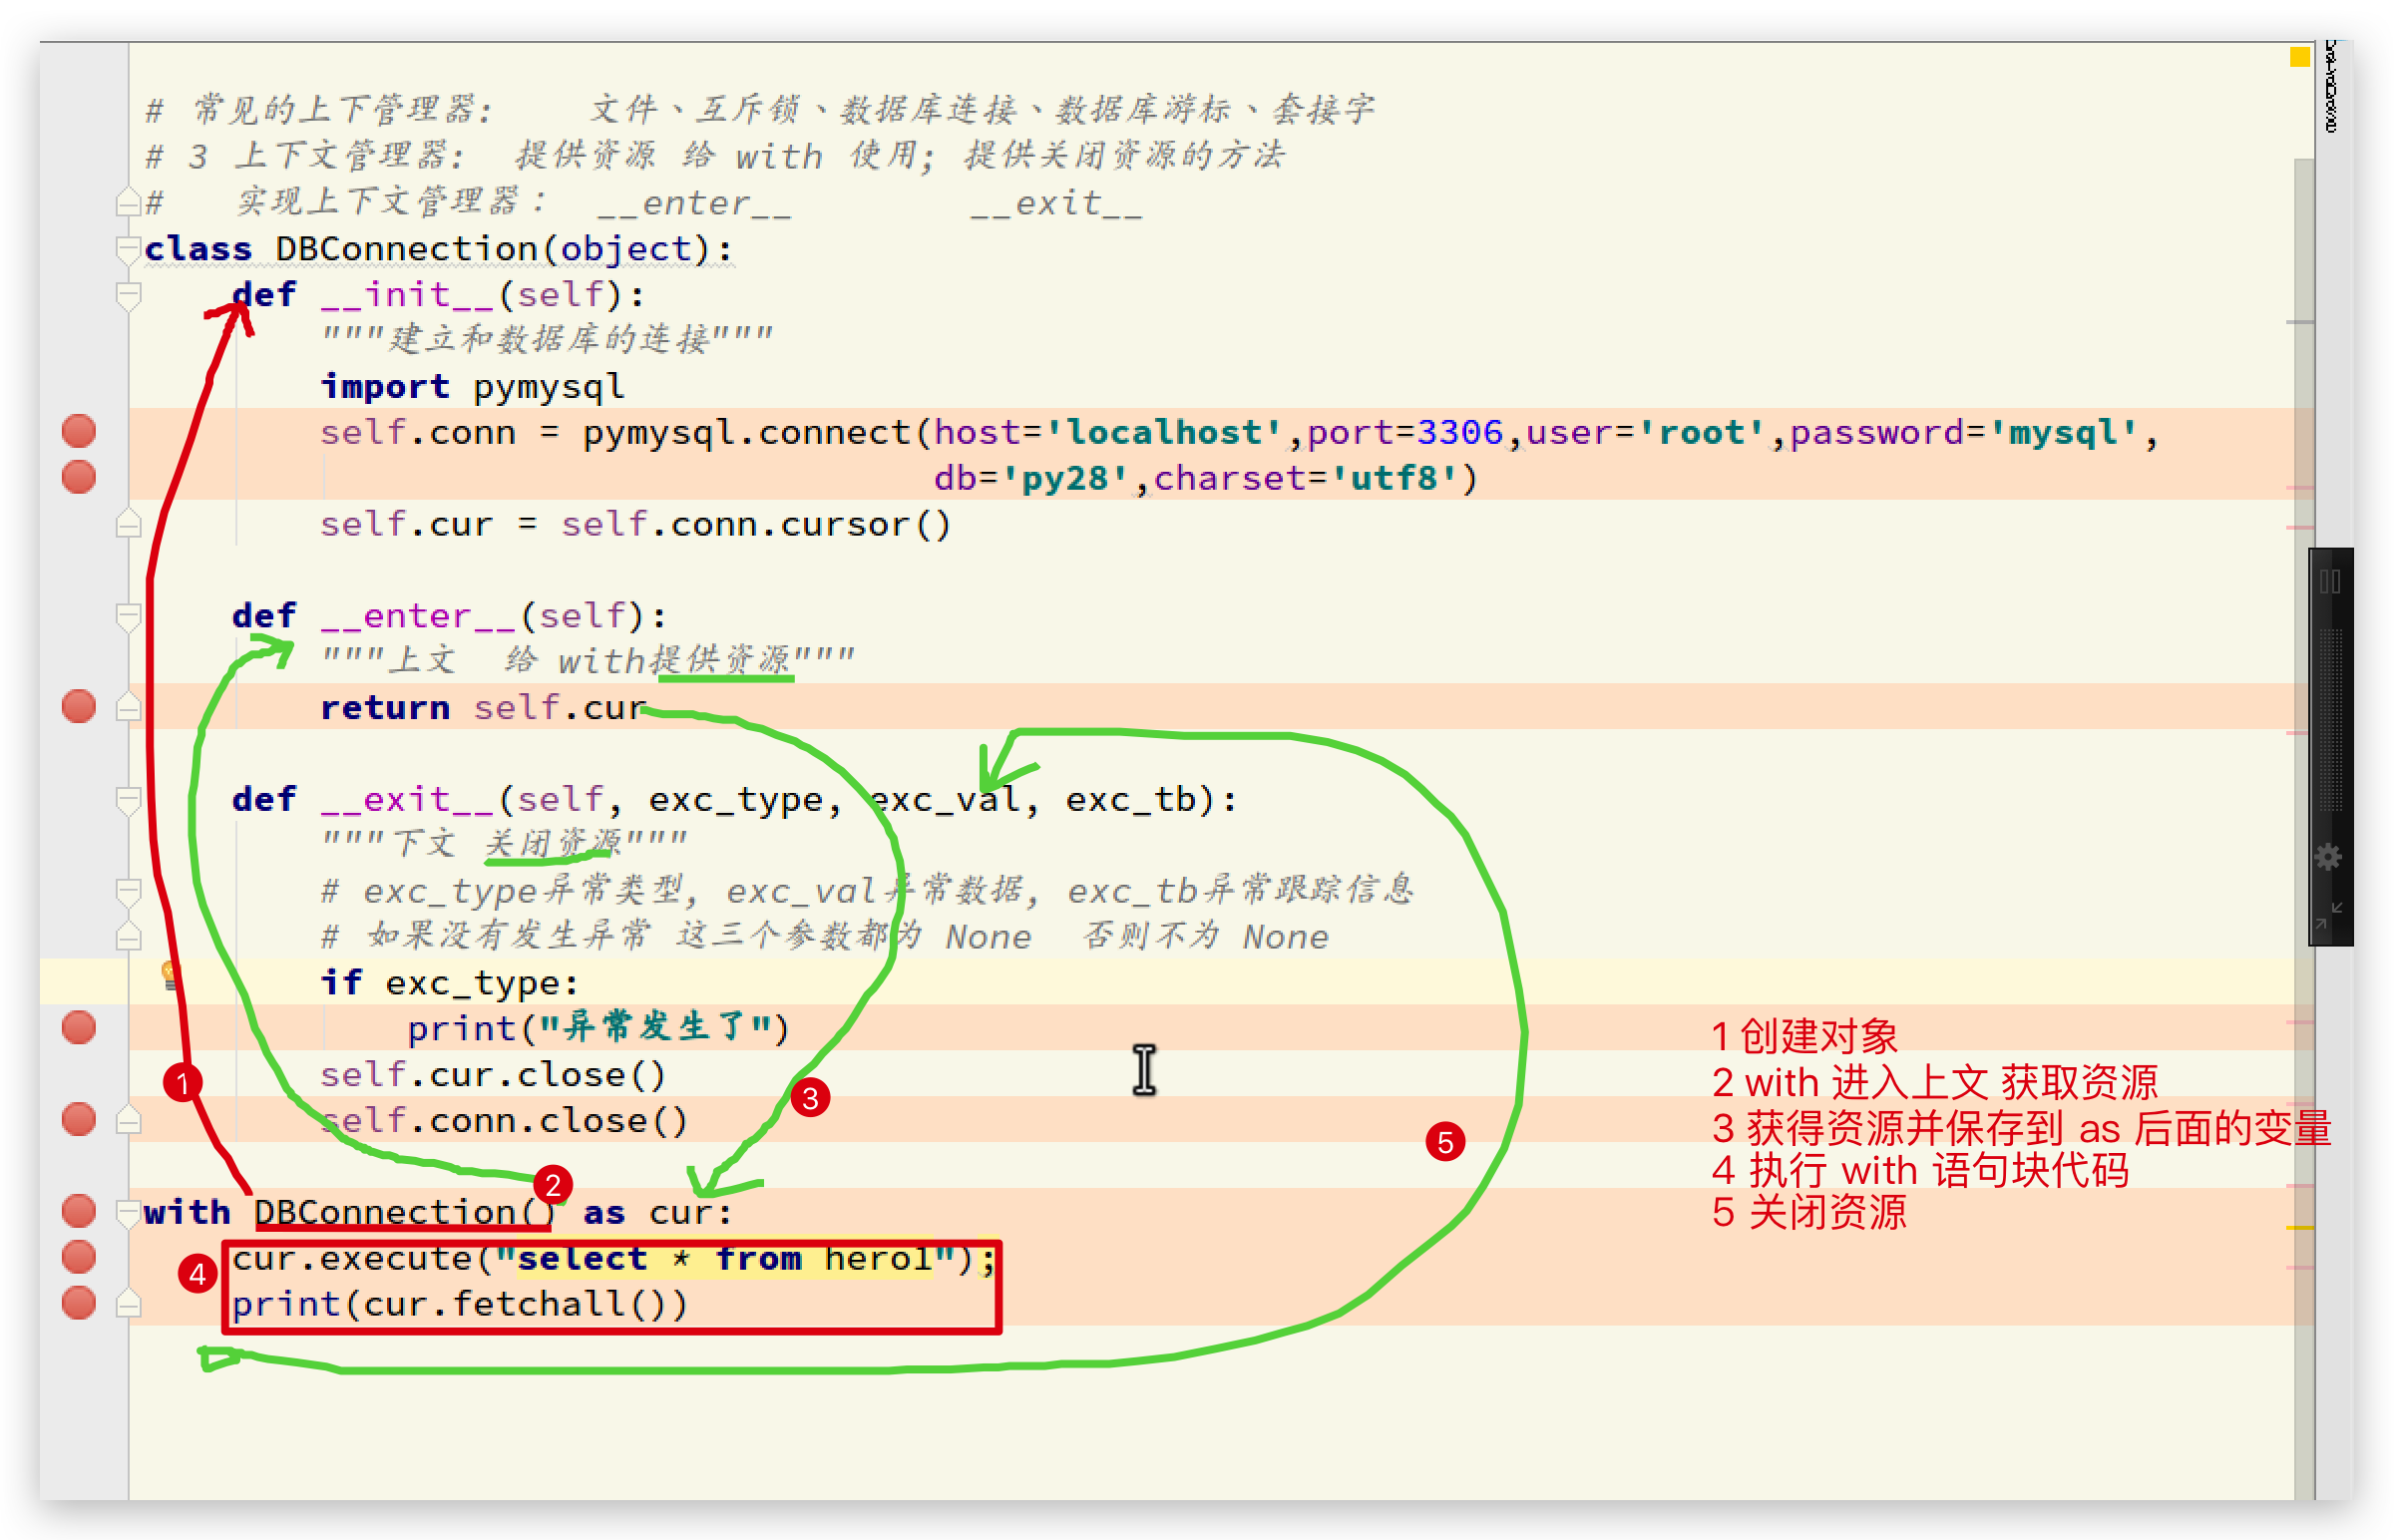

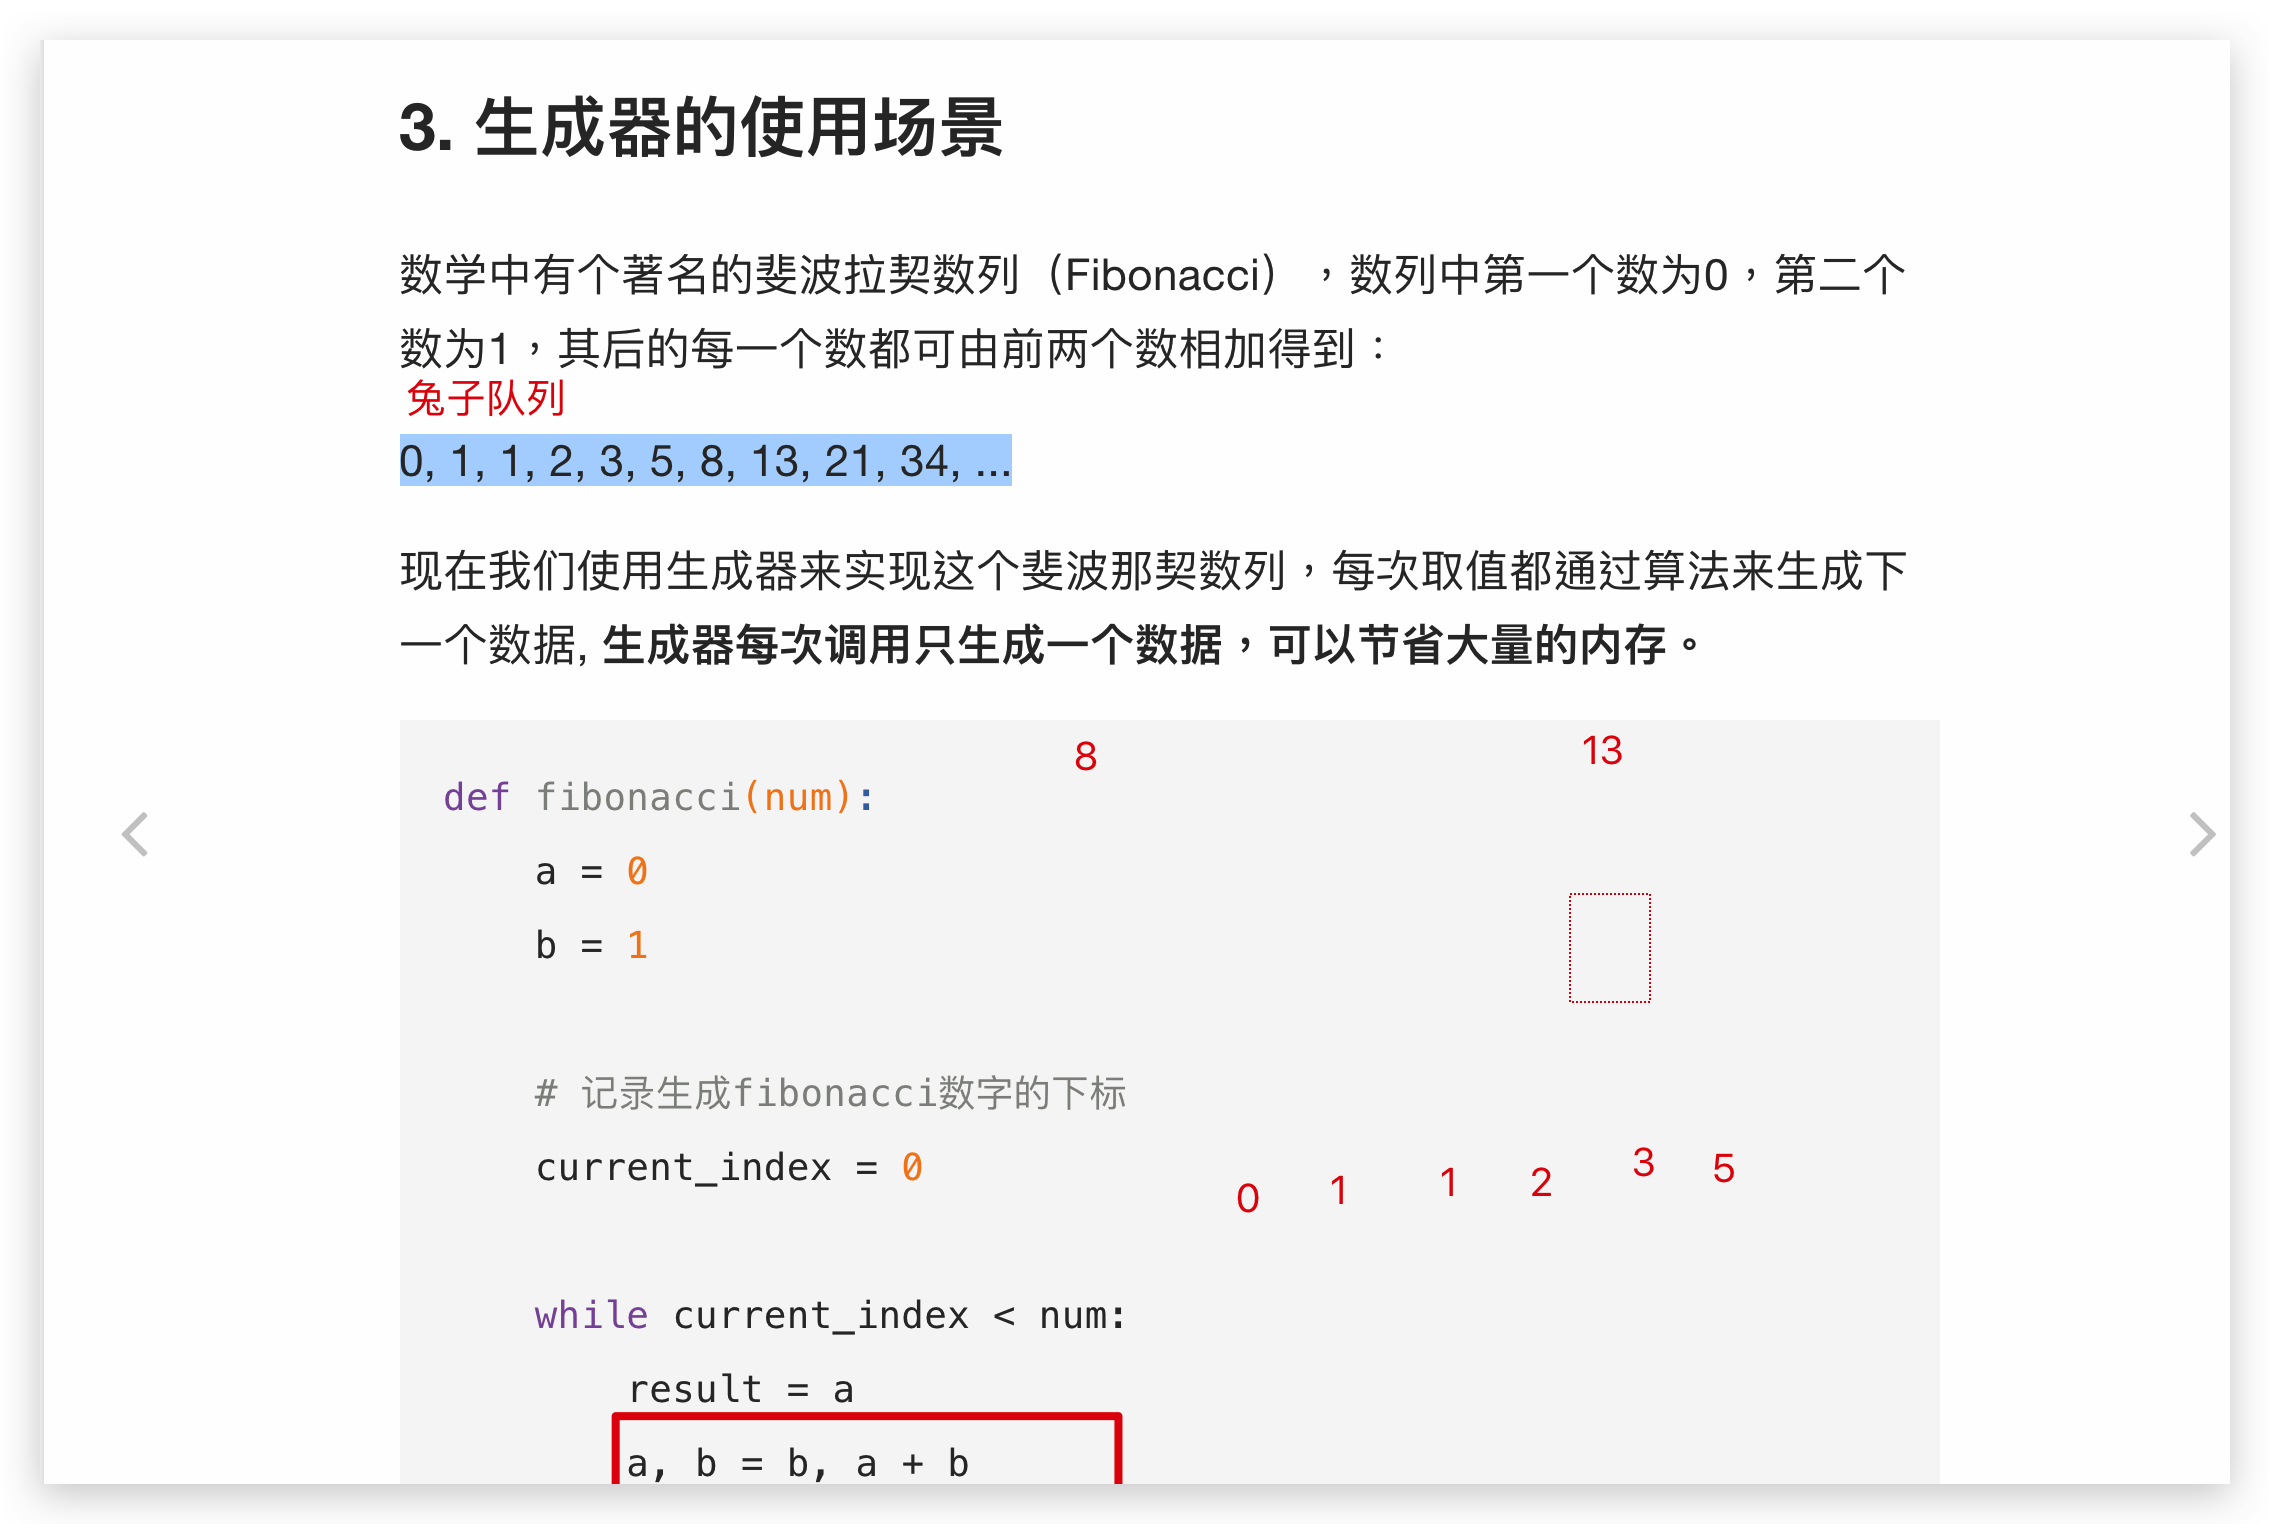

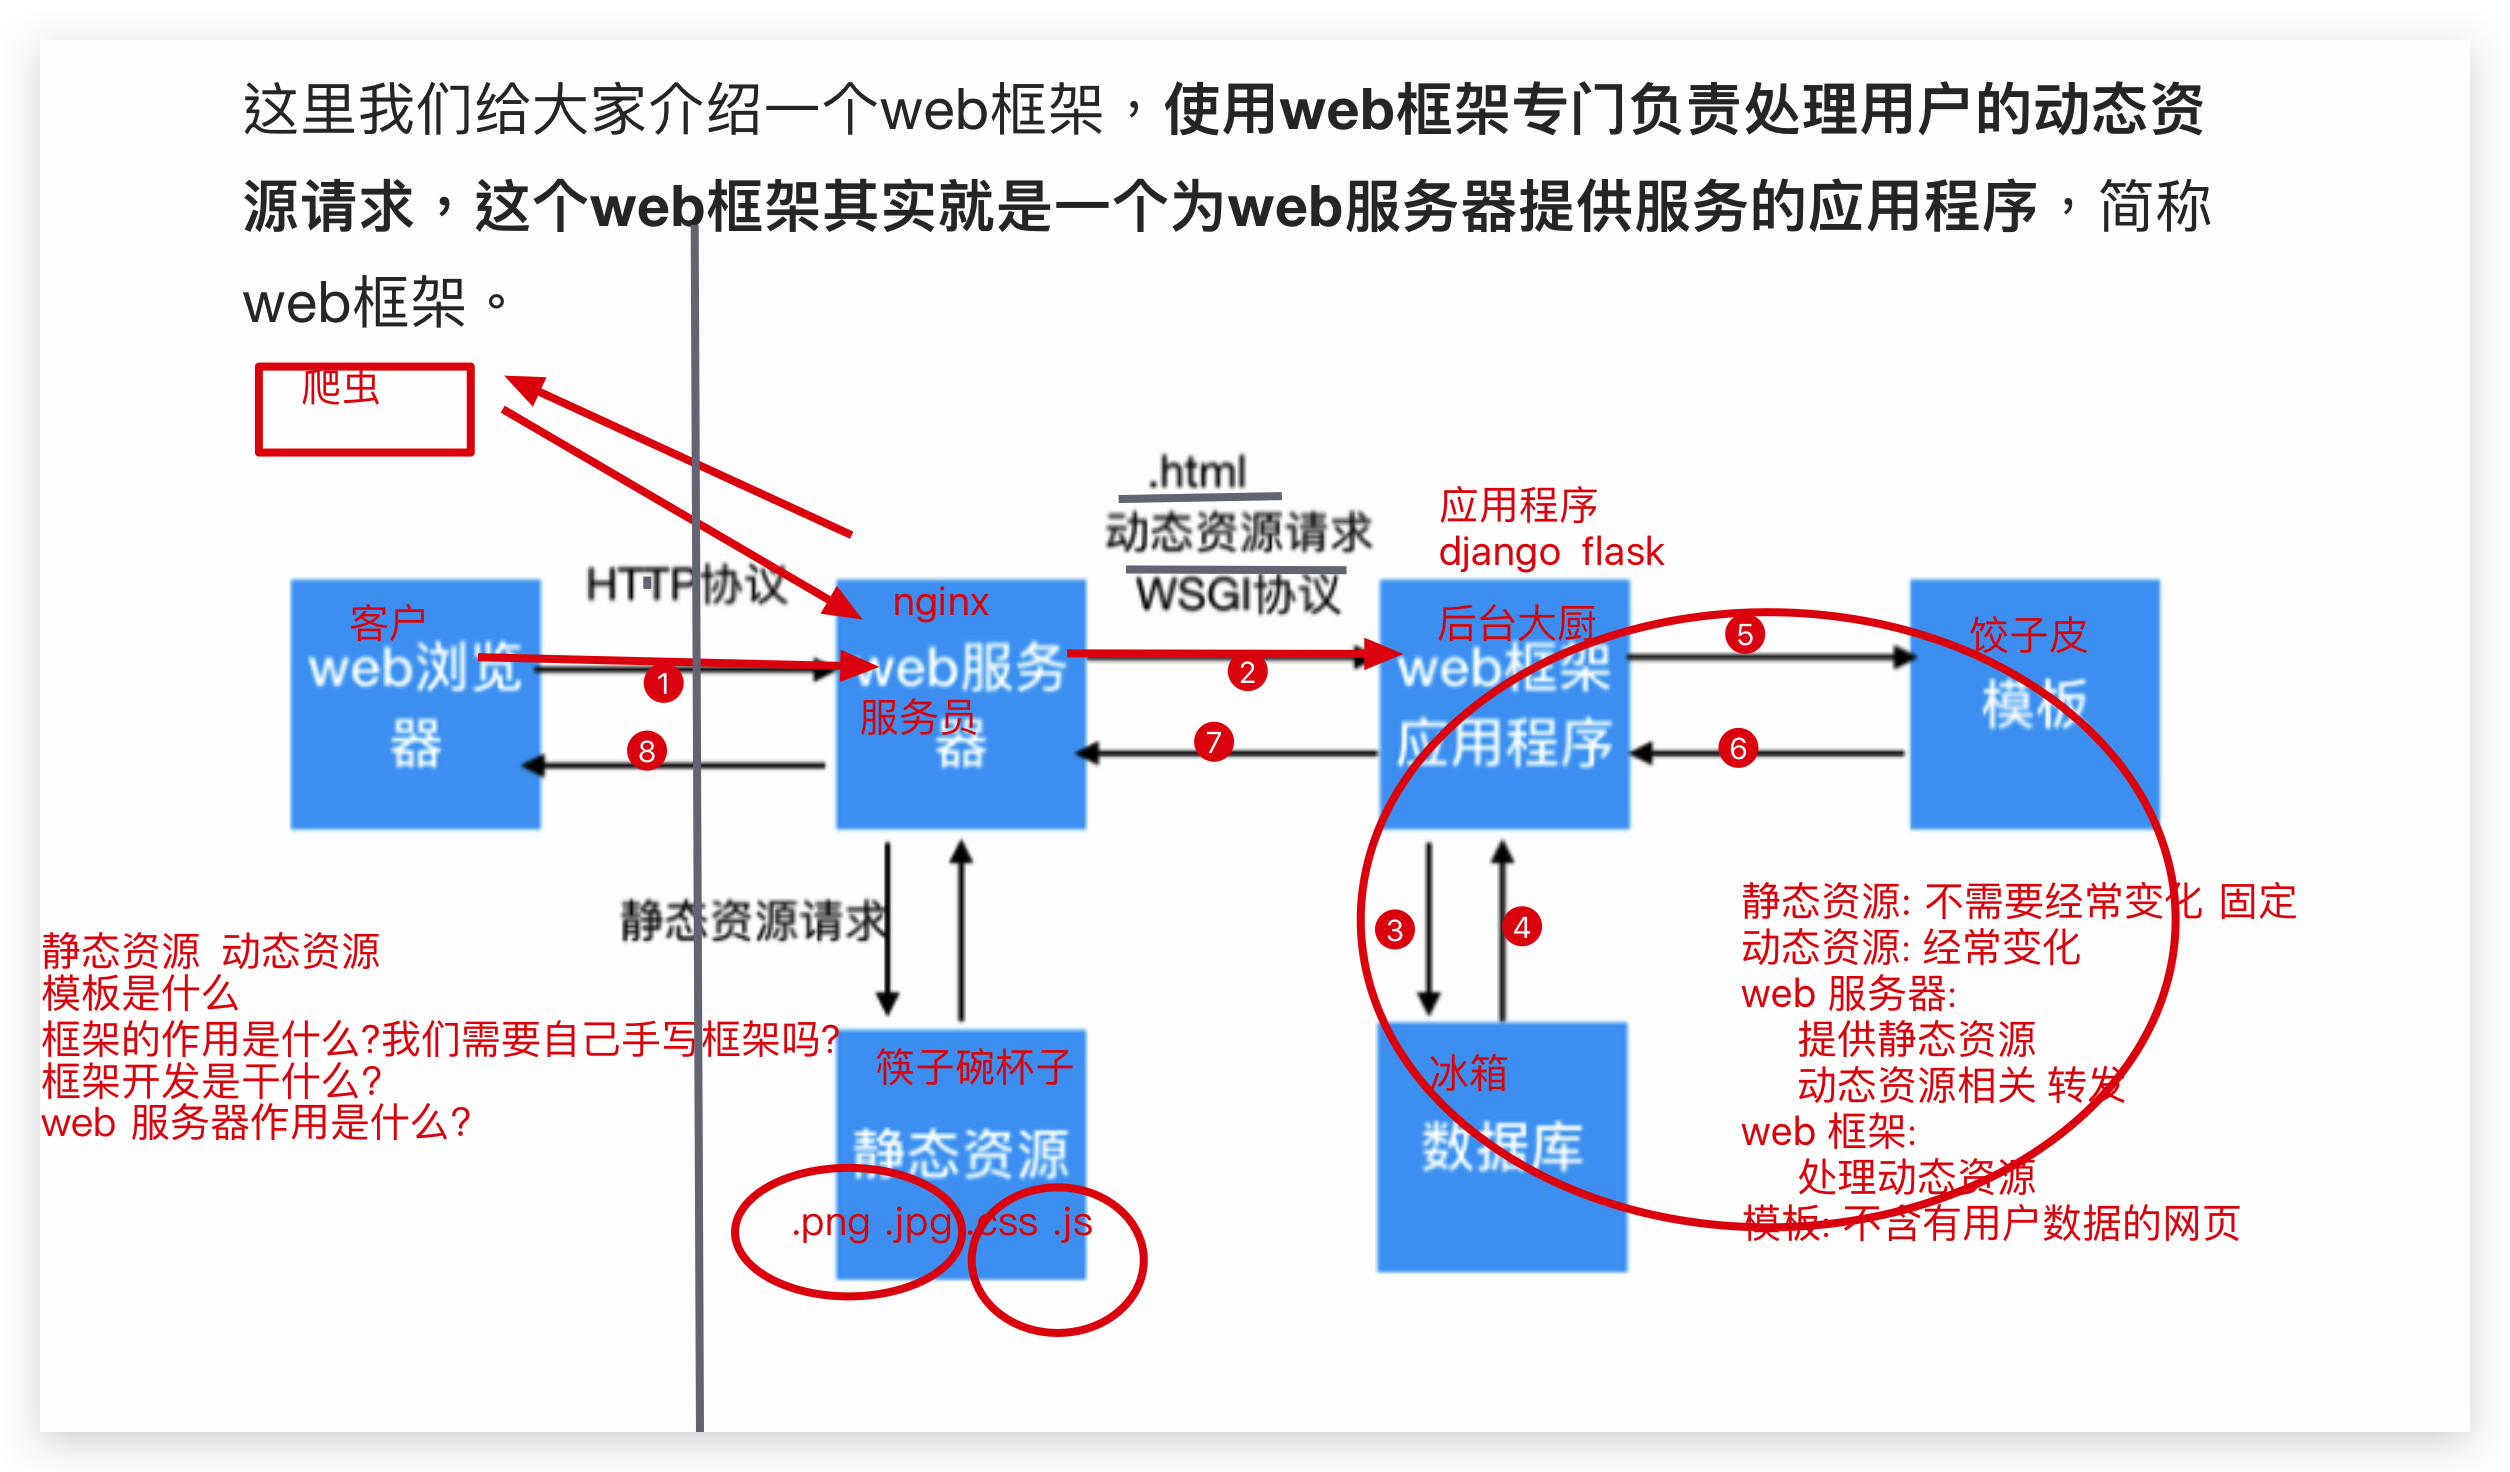

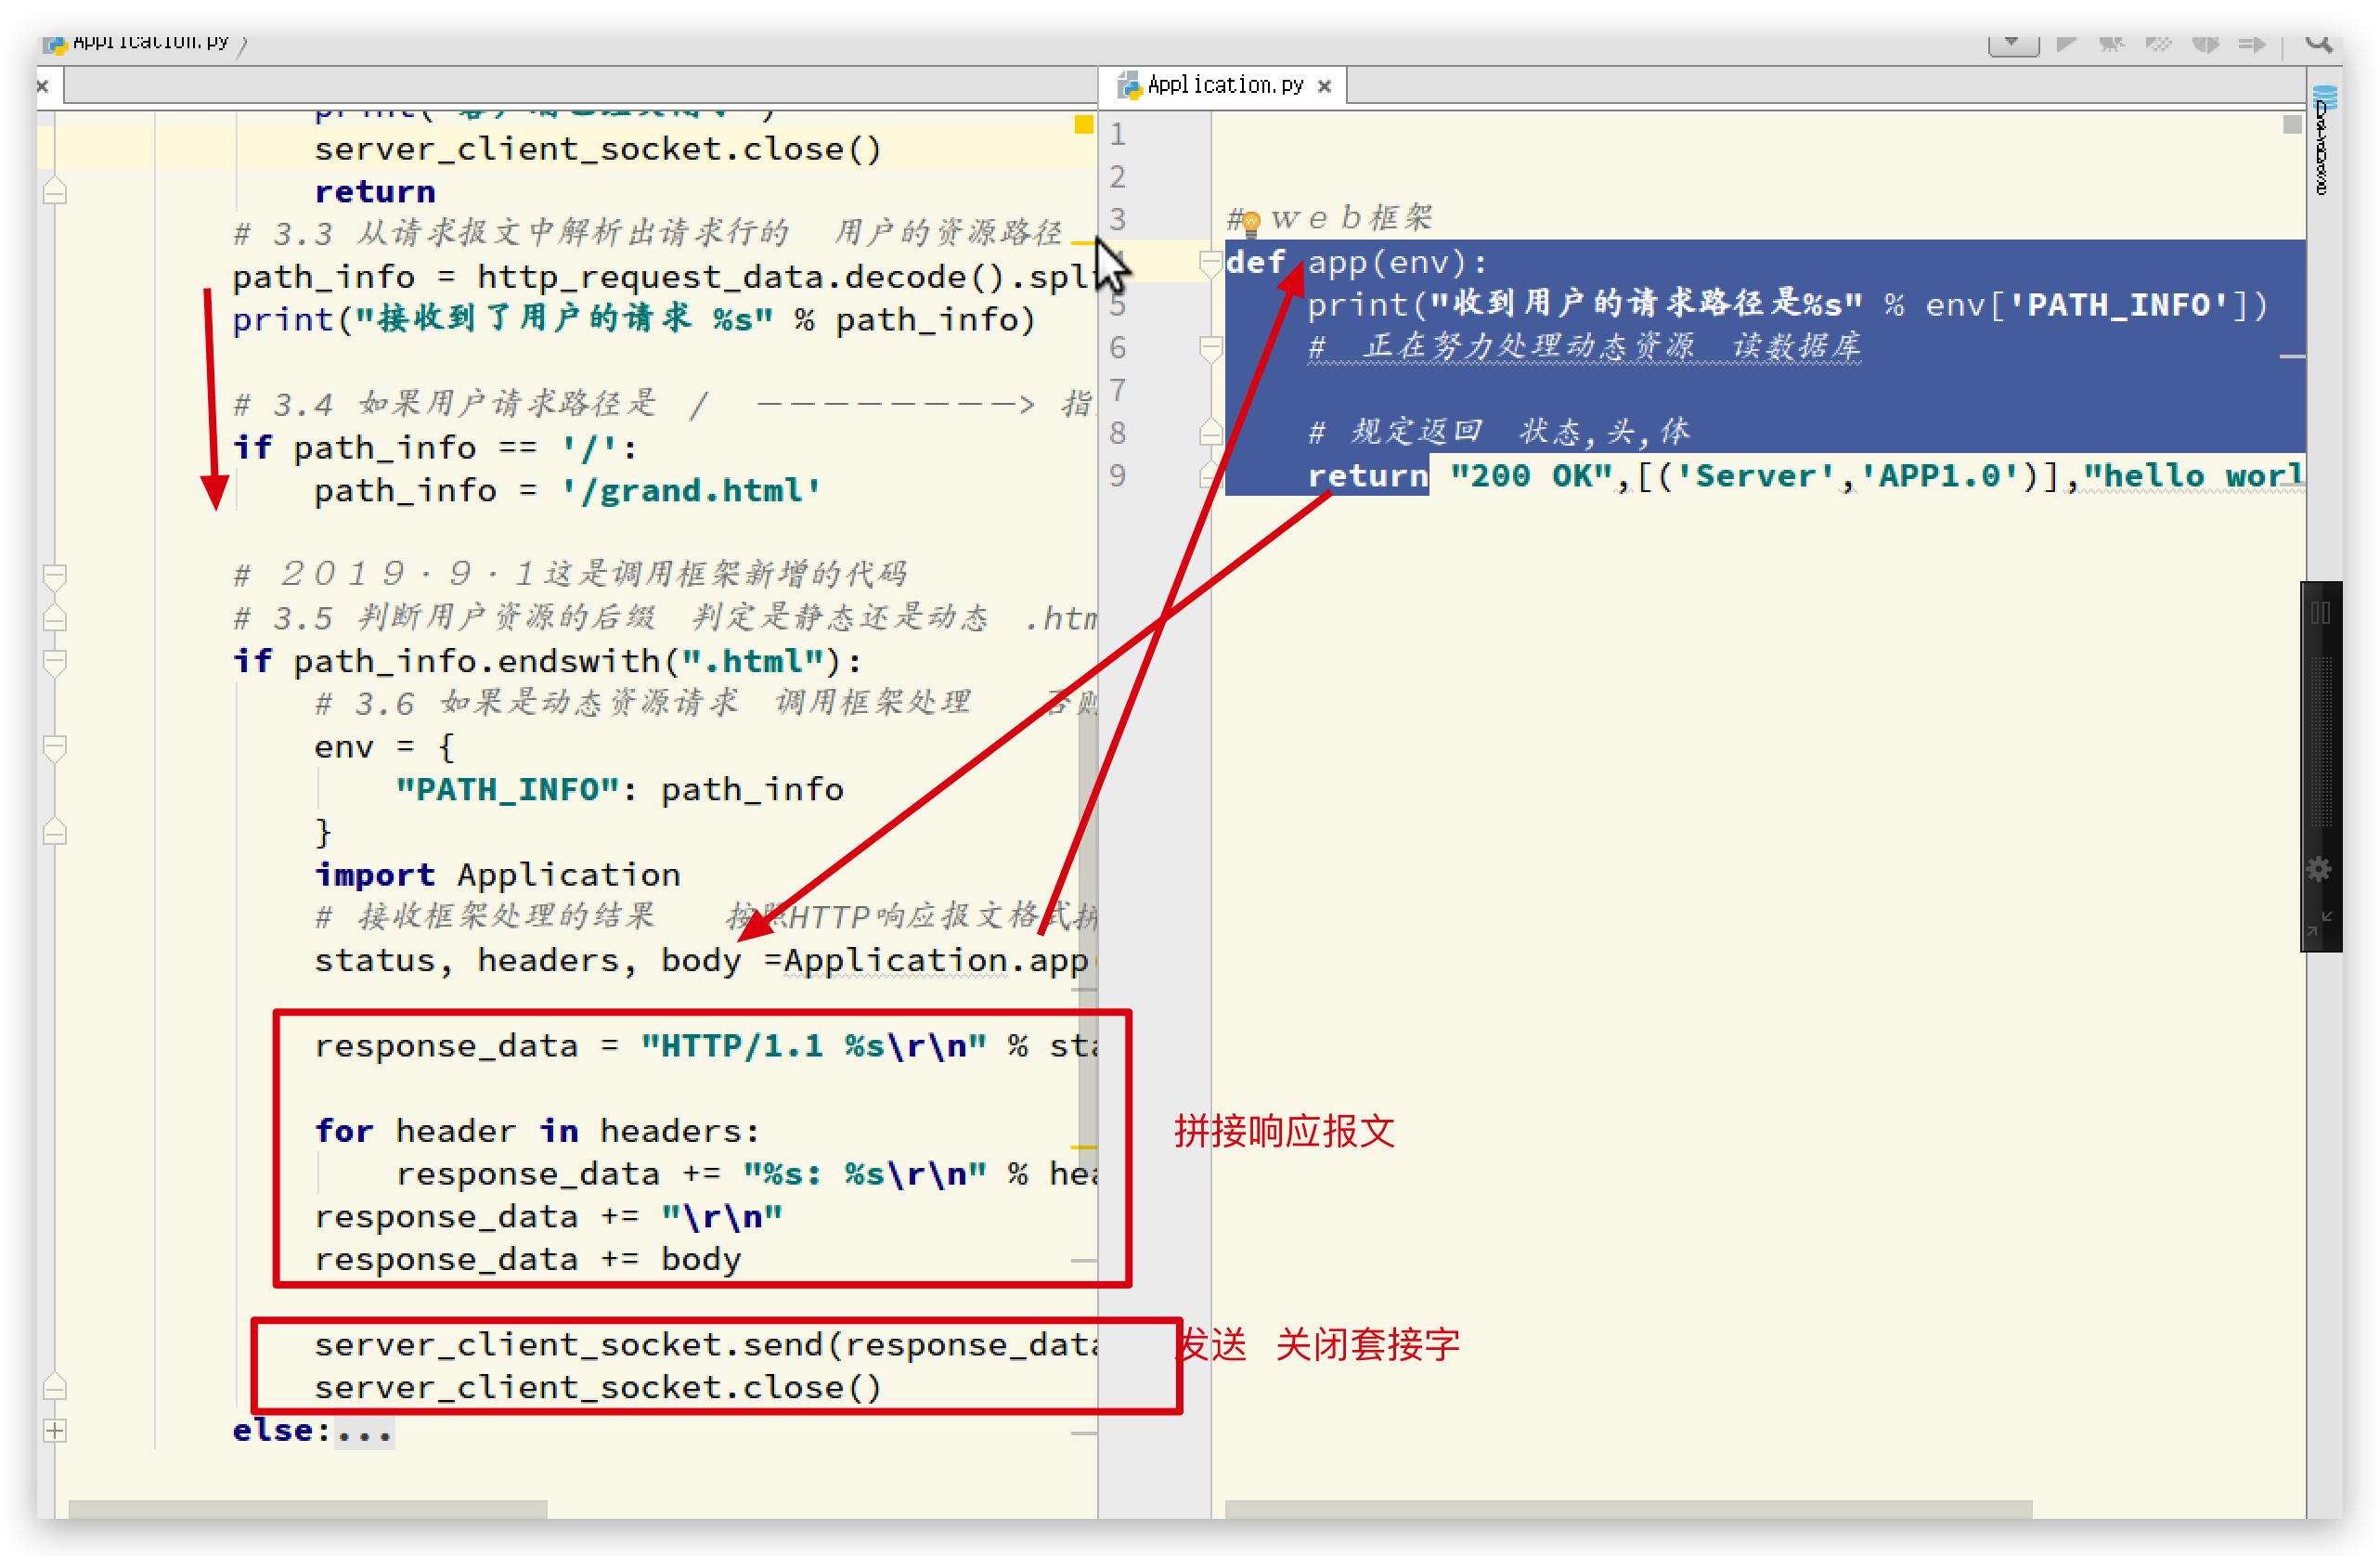

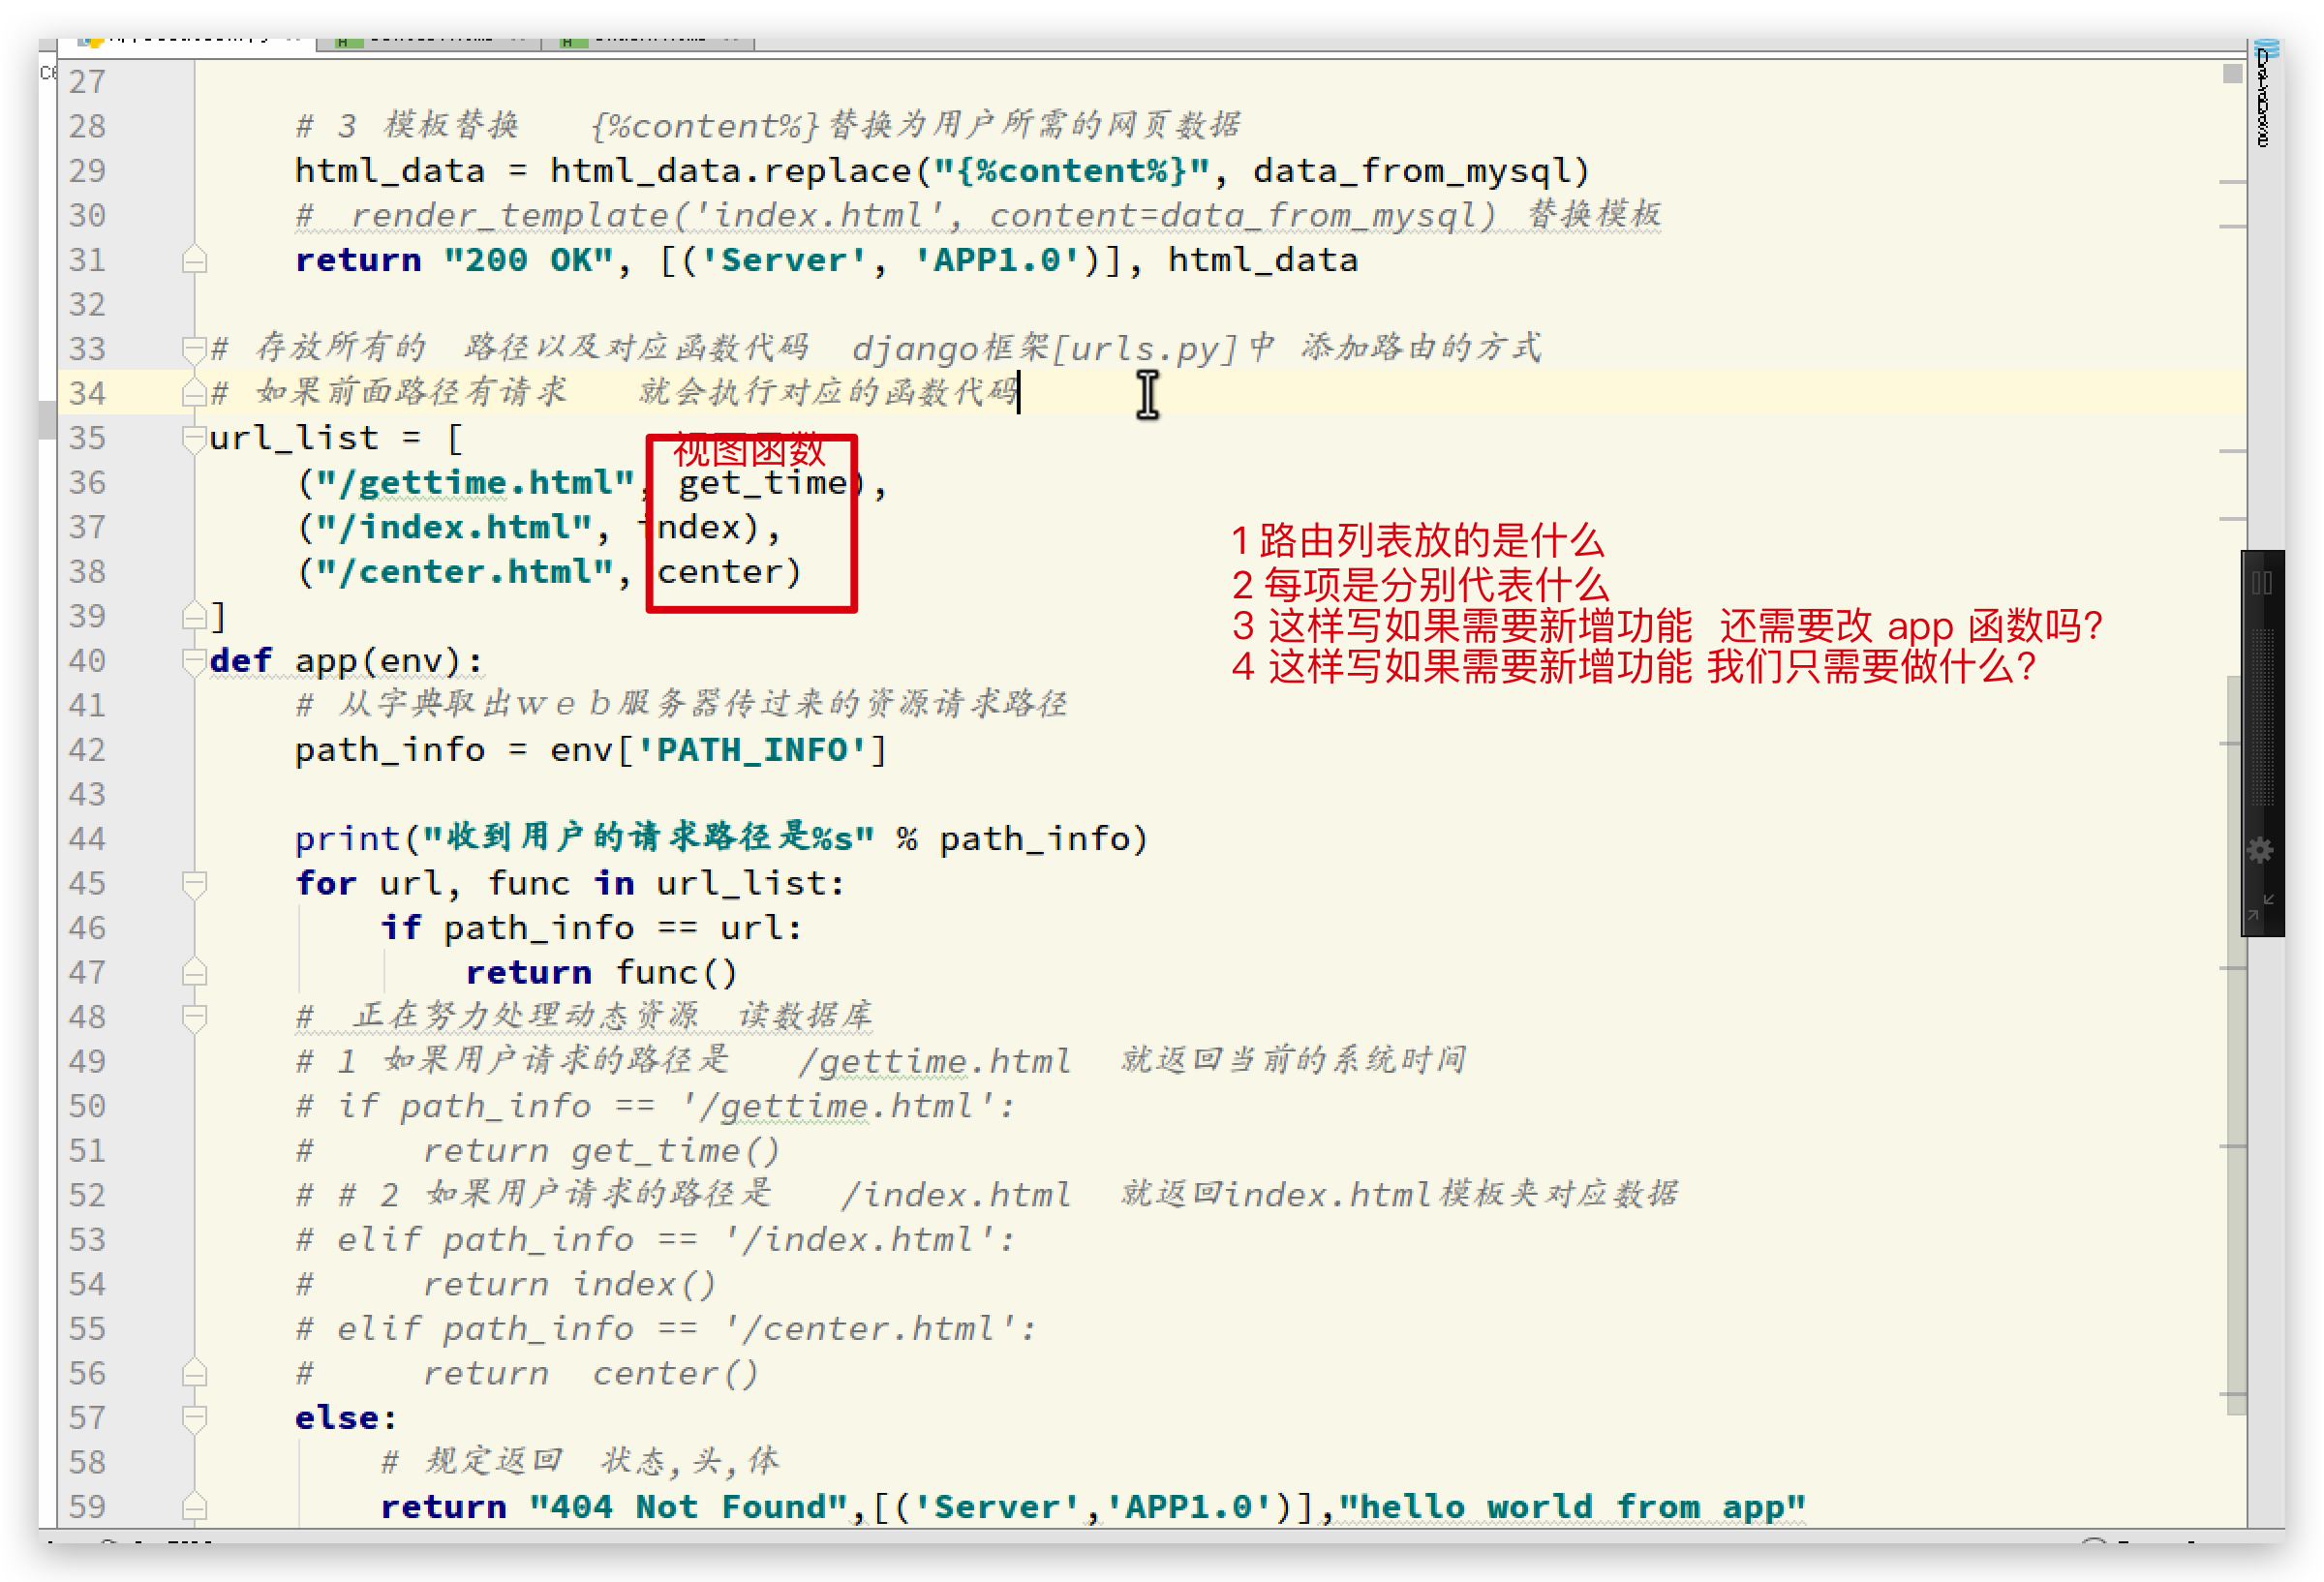

In [ ]:
# with 上下文管理器
import pymysql
import pandas as pd

class DbConnection(object):
    def __init__(self):
        self.conn = pymysql.connect(host="localhost",port=3306, user="root",
                                    password="mysql", db="py28", charset='utf8')
        self.cur = self.conn.cursor()

    def __enter__(self):
        return self.cur

    def __exit__(self, exc_type, exc_val, exc_tb):
        if exc_type:
            print("出现异常了")
        self.cur.close()
        self.conn.close()


with DbConnection() as cur:
    cur.execute("select * from students;")
    # for i in cur.fetchall():
    #     print(i)
    data = pd.Series(cur.fetchall())
    print(data)


In [ ]:
# 生成器创建方式一
l1 = [i for i in range(10000000)]
g1 = (i for i in range(10000000))
print(type(l1), type(g1))
print(l1.__sizeof__(),g1.__sizeof__())

In [1]:
# 生成器创建方式二 函数的方式
def fun():
    print("生成器函数执行了")
    yield 100
    yield 200
    yield 300

f = fun()

for i in f:
    print(i)


生成器函数执行了
100
200
300


In [2]:
def fun():
    print("生成器函数执行了")
    yield 100
    yield 200
    yield 300

f = fun()
print(next(f))
print(next(f))
print(next(f))
print(next(f))

生成器函数执行了
100
200
300


StopIteration: 

In [3]:
# 生成器的执行原理
def func():
    print("执行了")
    yield 100
    yield 200
    yield 300

    
f = func()

print(next(f))
while 1:
    try:
        i = next(f)
    except Exception as e:
        break
    else:
        print(i)

执行了
100
200
300


In [4]:
# 生成器实现range函数

def myRange(number):
    begain = 0
    while begain < number:
        yield begain
        begain += 1
        
for i in myRange(10):
    print(i)

0
1
2
3
4
5
6
7
8
9
